In [2]:
from IPython.display import Image

# Problems solved from Codewars.com


<font color='blue' size=6><i>4kyu</font>

## Snail

##### Task:
Snail Sort
Given an n x n array, return the array elements arranged from outermost elements to the middle element, traveling clockwise.

array = [[1,2,3],
         [4,5,6],
         [7,8,9]]
snail(array) #=> [1,2,3,6,9,8,7,4,5] <br>
For better understanding, please follow the numbers of the next array consecutively:

array = [[1,2,3],
         [8,9,4],
         [7,6,5]]
snail(array) #=> [1,2,3,4,5,6,7,8,9]
###### This image will illustrate things more clearly:

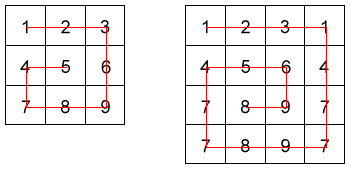

In [3]:
Image("http://www.haan.lu/files/2513/8347/2456/snail.png")

NOTE: The idea is not sort the elements from the lowest value to the highest; 
      the idea is to traverse the 2-d array in a clockwise snailshell pattern.

NOTE 2: The 0x0 (empty matrix) is represented as [[]]a<br>
https://www.codewars.com/kata/521c2db8ddc89b9b7a0000c1

##### Solution:

In [4]:
import numpy as np
import itertools
def snail(array):
    arr, result = np.array(array), []
    if arr.any() and np.squeeze(arr).any():
        while np.squeeze(arr).any(): 
            result.append(list(arr[0]))
            arr = np.delete(arr, (0), axis=0)
            arr = np.rot90(arr) 
        return list(itertools.chain(*result))
    else: return []

## Most frequently used words in a text

##### Task:
Write a function that, given a string of text (possibly with punctuation and line-breaks), returns an array of the top-3 most occurring words, in descending order of the number of occurrences.

Assumptions:
A word is a string of letters (A to Z) optionally containing one or more apostrophes (') in ASCII. (No need to handle fancy punctuation.)
Matches should be case-insensitive, and the words in the result should be lowercased.
Ties may be broken arbitrarily.
If a text contains fewer than three unique words, then either the top-2 or top-1 words should be returned, or an empty array if a text contains no words.
https://www.codewars.com/kata/51e056fe544cf36c410000fb

##### Solution:

In [5]:
import re
from collections import Counter
def top_3_words(text):
    if len(text):
        all_words = re.findall(r"[a-z']+'?", text.lower())
        w_size = len(all_words)
        if w_size:
            if all_words[0] == "'" or all_words[0] == "\'\'\'": return []  
            dic_words = Counter(all_words)
            def ret(n):
                return [i[0] for i in dic_words.most_common(n)]
            if   w_size == 1: return ret(1)
            elif w_size == 2: return ret(2)
            else:             return ret(3)
        else: return []
    else: return []

## One Line Task: Palindrome String

##### Task:
Your task is to generate a palindrome string, using the specified length n, the specified characters c(all characters in c must be used at least once).<br>
Code length should less than: python 55 characters.<br>
https://www.codewars.com/kata/58b57f984f353b3dc9000030

##### Solution:

In [6]:
palindrome=lambda n,c:(c*n)[:n//2]+(c*n)[~-n//2::-1]

## One Line Task: Squirrel And Tree

##### Task:
Since the weather was good, some students decided to go for a walk in the park after the first lectures of the new academic year. There they saw a squirrel, which climbed a tree in a spiral at a constant angle to the ground. They calculated that in one loop the squirrel climbes h meters (vertical height), the height of the tree is equal to H, and the length of its circumference equals S.

These calculations were exhausting, so now the students need your help to figure out how many meters the path length of squirrel climbed when it reached the tree top. The result should be rounded to 4 decimal places

Code limit: Less than 52 characters (JavaScript & Python)<br>
https://www.codewars.com/kata/59016379ee5456d8cc00000f

##### Solution:

In [7]:
squirrel=lambda h,H,S:round((H*H+(H*S/h)**2)**.5,4)

<font color='yellow' size=6><i>5kyu</font>

## Haiku Checker

##### Task:
Haikus are short poems in a three-line format, with 17 syllables arranged in a 5–7–5 pattern. Your task is to check if the supplied text is a haiku or not.

About syllables
Syllables are the phonological building blocks of words. In this kata, a syllable is a part of a word including a vowel ("a-e-i-o-u-y") or a group of vowels (e.g. "ou", "ee", "ay"). A few examples: "tea", "can", "to·day", "week·end", "el·e·phant".

However, silent "E"s do not create syllables. In this kata, an "E" is considered silent if it's alone at the end of the word, preceded by one (or more) consonant(s) and there is at least one other syllable in the word. Examples: "age", "ar·range", "con·crete"; but not in "she", "blue", "de·gree".

Some more examples:

* one syllable words: "cat", "cool", "sprout", "like", "eye", "squeeze"
* two syllables words: "ac·count", "hon·est", "beau·ty", "a·live", "be·cause", "re·store"

##### Solution:

In [8]:
import re
def is_haiku(text):
    
    def parse_line(line):
        word_pattern = r'[^\W\d_]+'
        return re.findall(word_pattern, line)
    def count_syllabes(word):
        vowel_pattern =  r'[aeiouy]+'
        vowels = re.findall(vowel_pattern, word, re.I)
        if vowels and vowels[-1] == 'e' and word[-1] == 'e':
           vowels.pop()
        return max(len(vowels),1)
    
    syllables = [sum(map(count_syllabes, parse_line(line)))
                    for line in text.splitlines()]

    return syllables ==[5, 7, 5]

<font color='yellow' size=6><i>6kyu</font>

## Strange roman numbers

##### Task:
Many years ago, Roman numbers were defined by only 4 digits: I, V, X, L, which represented 1, 5, 10, 50. These were the only digits used. The value of a sequence was simply the sum of digits in it. For instance:

IV = VI = 6
IX = XI = 11
XXL = LXX = XLX = 70
It is easy to see that this system is ambiguous, and some numbers could be written in many different ways. Your goal is to determine how many distinct integers could be represented by exactly n Roman digits grouped together. For instance:

solve(1) = 4, because groups of 1 are [I, V, X, L]. <br>
solve(2) = 10, because the groups of 2 are [II, VI, VV, XI, XV, XX, IL, VL, XL, LL] corresponding to [2,6,10,11,15,20,51,55,60,100].<br> 
solve(3) = 20, because groups of 3 start with [III, IIV, IVV, ...etc]<br>
n will be <=10,000,000

##### Solution:

In [9]:
from functools import lru_cache
THRESHOLD = 12
DIGITS = [1, 5, 10, 50]
def solve_naive(n):
    minimal = n * min(DIGITS)
    maximal = n * max(DIGITS)
    return maximal - minimal
@lru_cache(maxsize = THRESHOLD)    
def solve_brut(n):
    #iloczyn kartezjanski
    from itertools import product
    combinations = product(DIGITS, repeat = n)
    #sumowanie wartości w krotce
    values = map(sum, combinations)
    return len(set(values))
@lru_cache(maxsize = THRESHOLD)      
def determinate_delta (tries = 12):
    deltas = (solve_naive(n) - solve_brut(n)
    for n in range(1, tries +1))
    return max (deltas)
def solve(n):
    if n > THRESHOLD:
        return solve_naive(n) - determinate_delta(THRESHOLD)
    return solve_brut(n) 

## Which are in?

##### Task:
Given two arrays of strings a1 and a2 return a sorted array r in lexicographical order of the strings of a1 which are substrings of strings of a2.

#Example 1: a1 = ["arp", "live", "strong"]

a2 = ["lively", "alive", "harp", "sharp", "armstrong"]

returns ["arp", "live", "strong"]

#Example 2: a1 = ["tarp", "mice", "bull"]

a2 = ["lively", "alive", "harp", "sharp", "armstrong"]

returns []

Notes:
* Arrays are written in "general" notation. See "Your Test Cases" for examples in your language.
* In Shell bash a1 and a2 are strings. The return is a string where words are separated by commas.
* Beware: r must be without duplicates.
* Don't mutate the inputs.

##### Solution:

In [11]:
def in_array(substrings, strings):
    resoult = []
    for string in strings:
        for substring in substrings:
           if (substring in string):
               resoult.append(substring)
    return sorted(list(set(resoult)))

## Encrypt this!

##### Task:
You want to create secret messages which can be deciphered by the Decipher this! kata.<br>
Here are the conditions:

Your message is a string containing space separated words.<br>
You need to encrypt each word in the message using the following rules:<br>
The first letter needs to be converted to its ASCII code.<br>
The second letter needs to be switched with the last letter<br>
Keepin' it simple: There are no special characters in input.<br><br>
Examples:
* encrypt_this("Hello") == "72olle"
* encrypt_this("good") == "103doo"
* encrypt_this("hello world") == "104olle 119drlo"

##### Solution:

In [13]:
def encrypt_this(text): 
    words = text.split()
    changedString = []
    for word in words:
        letters = list(word)
        if len(letters) > 0: letters[0] = str(ord(letters[0]))          
        if len(letters) > 1: letters[1] , letters[-1] = letters[-1] , letters[1] 
        changedString.append(''.join(letters))
    return ' '.join(changedString)

## Find the unique number

##### Task:
There is an array with some numbers. All numbers are equal except for one. Try to find it!

find_uniq([ 1, 1, 1, 2, 1, 1 ]) == 2<br>
find_uniq([ 0, 0, 0.55, 0, 0 ]) == 0.55<br>
It’s guaranteed that array contains more than 3 numbers.<br>
Think about perfomance.

##### Solution:

In [14]:
import numpy as np
def find_uniq(arr):
    unique, amount  = np.unique(arr,return_counts=True)
    idx = np.argmin(amount)
    return (unique[idx])

## Ideal electron distribution

##### Task:
You are a khmmadkhm scientist and you decided to play with electron distribution among atom's shells. You know that basic idea of electron distribution is that electrons should fill a shell untill it's holding the maximum number of electrons.

Rules:

* Maximum number of electrons in a shell is distributed with a rule of 2n^2 (n being position of a shell).
* For example, maximum number of electrons in 3rd shield is 2*3^2 = 18.
* Electrons should fill the lowest level shell first.
* If the electrons have completely filled the lowest level shell, the other unoccupied electrons will fill the higher level shell and so on.

##### Solution:

In [17]:
def atomic_number(electrons):
    n, eShells = 1, []
    while(electrons > 0):
        shell = 2*n**2
        if electrons < shell:
            shell = electrons
            electrons = 0
        else:
            electrons -= shell
        eShells.append(shell)
        n += 1
    return eShells   

## Simple transposition

##### Task:
Simple transposition is a basic and simple cryptography technique. We make 2 rows and put first a letter in the Row 1, the second in the Row 2, third in Row 1 and so on until the end. Then we put the text from Row 2 next to the Row 1 text and thats it.

Complete the function that recieves a string and encrypt it with this simple transposition.

Example
For example if the text to encrypt is: "Simple text", the 2 rows will be:

Row 1	S	m	l		e	t <br>
Row 2	i	p	e	t	x	

So the result string will be: `"Sml etipetx"`

##### Solution:

In [18]:
def simple_transposition(text):
    list1, list2 = [],[]
    [list1.append(letter) if i % 2 == 0 
                          else list2.append(letter) 
                          for i, letter in enumerate(text)]
    return (''.join(list1 + list2))

## Delete occurrences of an element if it occurs more than n times

##### Task:
Given a list lst and a number N, create a new list that contains each number of lst at most N times without reordering. For example if N = 2, and the input is [1,2,3,1,2,1,2,3], you take [1,2,3,1,2], drop the next [1,2] since this would lead to 1 and 2 being in the result 3 times, and then take 3, which leads to [1,2,3,1,2,3].

Example
  delete_nth ([1,1,1,1],2) <br>
  return [1,1]

  delete_nth ([20,37,20,21],1) <br>
  return [20,37,21]

##### Solution:

In [19]:
def delete_nth(order,max_e):
    if not order or max_e < 1:
        return []
    
    counted_order = { x:0 for x in order }
    new_order = []
    
    for item in order:
        if counted_order[item] < max_e:
            counted_order[item] += 1
            new_order.append(item)
  
    return new_order

## Find The Duplicated Number in a Consecutive Unsorted List - Tougher Version

##### Task:
Spin-off of this kata, here you will have to figure out an efficient strategy to solve the problem of finding the sole duplicate number among an unsorted array/list of numbers starting from 1 up to n.

Hints: a solution in linear time can be found; using the most intuitive ones to search for duplicates that can run in O(n²) time won't work.

##### Solution:

In [21]:
def find_dup(arr):
    arr.sort()
    for i in range(len(arr) - 1):
        if arr[i] == arr[i + 1]:
            return arr[i]